### Predicting var0

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Import Dataset

In [4]:
df = pd.read_csv("braviant.csv",sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
var0     100000 non-null int64
var1     100000 non-null int64
var2     100000 non-null int64
var3     100000 non-null int64
var4     100000 non-null object
var5     100000 non-null int64
var6     100000 non-null int64
var7     100000 non-null int64
var8     95066 non-null object
var9     100000 non-null int64
var10    100000 non-null object
var11    100000 non-null int64
var12    100000 non-null int64
dtypes: int64(10), object(3)
memory usage: 9.9+ MB


In [5]:
df.head(10)

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,0,0,2,838,$96300,0,4,107,N,1,A,893,1
1,0,2,1,837,$59300,1,1,611,N,4,B,389,1
2,0,1,1,786,$38500,0,1,212,N,2,C,788,0
3,0,0,1,481,$75300,1,2,428,N,1,C,572,0
4,0,1,1,674,$63200,1,2,91,N,1,B,909,1
5,0,0,1,470,$5700,2,2,703,N,2,A,297,1
6,0,3,0,123,$58700,0,2,874,N,12,A,126,1
7,0,1,2,121,$54300,3,2,370,N,6,B,630,1
8,0,0,1,621,$37500,2,1,780,NaN,6,B,220,1
9,0,0,0,807,$47700,1,5,678,N,2,A,322,1


In [6]:
df.describe(include="all")

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
count,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,95066,100000.000000,100000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,990,NaN,NaN,NaN,2,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,$39900,NaN,NaN,NaN,N,NaN,B,NaN,NaN
freq,NaN,NaN,NaN,NaN,129,NaN,NaN,NaN,85537,NaN,33396,NaN,NaN
mean,0.024530,0.998050,1.001560,498.202310,NaN,2.100510,3.008840,499.205970,NaN,6.033160,NaN,500.794030,0.666640
std,0.154688,1.001287,1.001343,288.619309,NaN,104.859422,1.738647,287.972058,NaN,32.458147,NaN,287.972058,0.471416
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,-999.000000,NaN,1.000000,0.000000
25%,0.000000,0.000000,0.000000,248.000000,NaN,0.000000,2.000000,250.000000,NaN,2.000000,NaN,252.000000,0.000000
50%,0.000000,1.000000,1.000000,498.000000,NaN,1.000000,3.000000,499.000000,NaN,5.000000,NaN,501.000000,1.000000
75%,0.000000,2.000000,2.000000,748.000000,NaN,2.000000,4.000000,748.000000,NaN,10.000000,NaN,750.000000,1.000000


In [7]:
df.shape

(100000, 13)

#### There are 100,000 instance, 12 independent variables and 1 dependent variable "var0"

In [8]:
df.var0.unique()

array([0, 1])

### Detect Missing Value

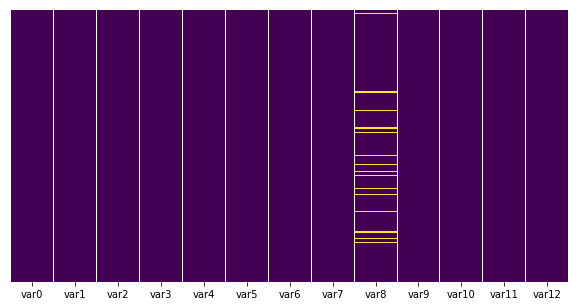

In [9]:
plt.figure(figsize=(10,5))
sns.set_context(font_scale=10)  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### There are some missing value for "var8"

In [10]:
# Convert var4 into integer
df["var4"] = df.var4.apply(lambda x: int(x.strip("$")))

# Convert var0 and var 12 into object
df["var0"] = df.var0.apply(lambda x: str(x))
df["var12"] = df.var12.apply(lambda x: str(x))

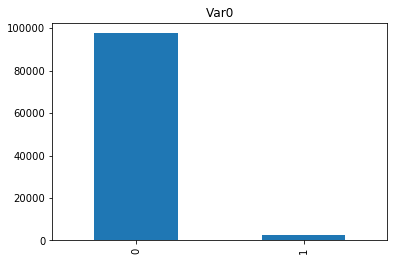

In [11]:
# Check the Target Variable
df['var0'].value_counts().plot(kind='bar', title = 'Var0')

#### The frequency plot of the target variable shows that there is a huge data embalance problem since the "1" cases are much more less than the "0" cases. In order to solve this problem, I will need to do oversampling for the "1" instances. Otherwise, the modeling process will have a huge problem.

### Data Visualization for Numerical, Ordinal and Categorical Features

#### 1. Numerical Features

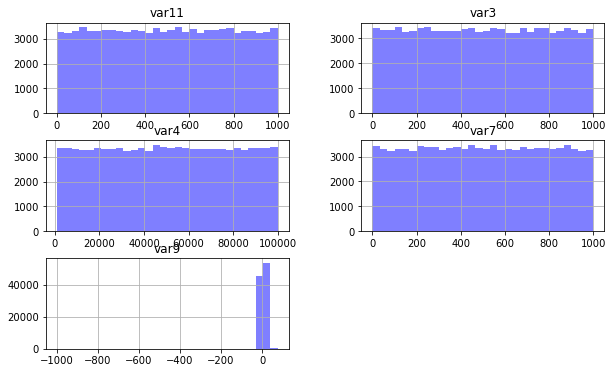

In [12]:
# Histogram
_ = df[['var3','var4','var9','var7','var11']].hist(bins=30,alpha=0.5,color='blue',figsize=(10,6))

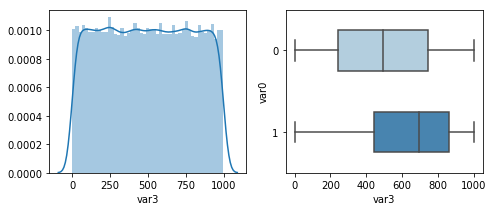

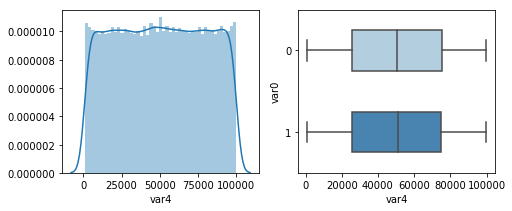

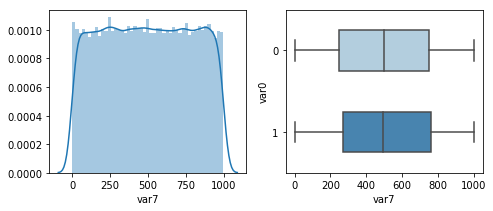

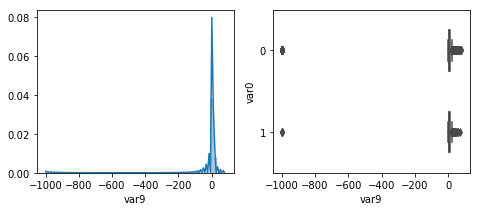

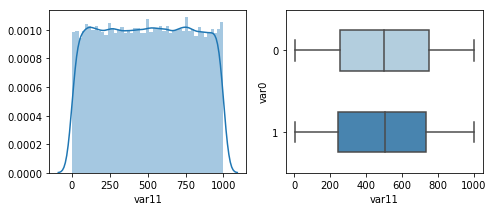

In [13]:
# Combine histogram and box-plot
# var3
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
sns.distplot(df["var3"])
ax1 = fig.add_subplot(132)
sns.boxplot(x=df["var3"], y=df["var0"],palette="Blues",width=0.5,orient="h")
# var4
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
sns.distplot(df["var4"])
ax1 = fig.add_subplot(132)
sns.boxplot(x=df["var4"], y=df["var0"],palette="Blues",width=0.5,orient="h")
# var7
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
sns.distplot(df["var7"])
ax1 = fig.add_subplot(132)
sns.boxplot(x=df["var7"], y=df["var0"],palette="Blues",width=0.5,orient="h")
# var9
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
sns.distplot(df["var9"])
ax1 = fig.add_subplot(132)
sns.boxplot(x=df["var9"], y=df["var0"],palette="Blues",width=0.5,orient="h")
# var11
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
sns.distplot(df["var11"])
ax1 = fig.add_subplot(132)
sns.boxplot(x=df["var11"], y=df["var0"],palette="Blues",width=0.5,orient="h")

#### 2. Ordinal Features

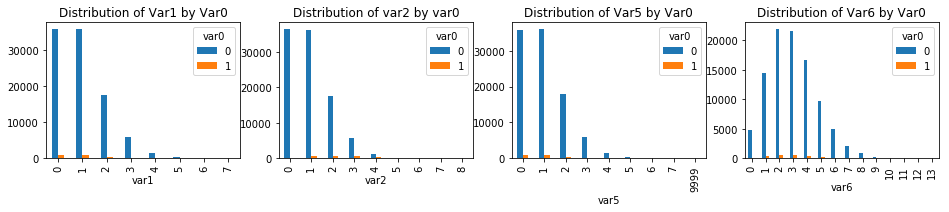

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4,squeeze=False,figsize=(16,2.5))
# var1
var1_0 = pd.crosstab(df["var1"],df["var0"])
var1_0.plot(kind="bar",title="Distribution of Var1 by Var0",ax=axes[0,0])
# var2
var2_0 = pd.crosstab(df["var2"],df["var0"])
var2_0.plot(kind="bar",title="Distribution of var2 by var0",ax=axes[0,1])
# var5
var5_0 = pd.crosstab(df["var5"],df["var0"])
var5_0.plot(kind="bar",title="Distribution of Var5 by Var0",ax=axes[0,2])
# var6
var6_0 = pd.crosstab(df["var6"],df["var0"])
var6_0.plot(kind="bar",title="Distribution of Var6 by Var0",ax=axes[0,3])

#### 3. Categorical Features

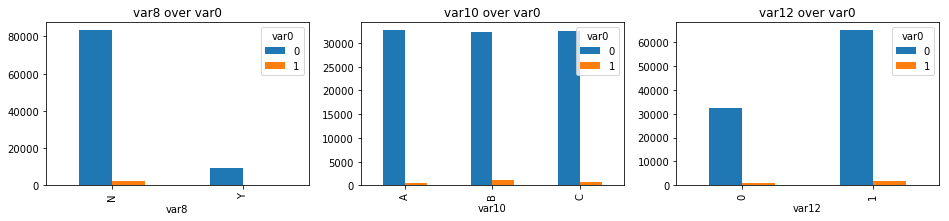

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3,squeeze=False,figsize=(16,3))
var8_0 = pd.crosstab(df["var8"],df["var0"])
var8_0.plot(kind="bar",title="var8 over var0",ax=axes[0,0])
var10_0 = pd.crosstab(df["var10"],df["var0"])
var10_0.plot(kind="bar",title="var10 over var0",ax=axes[0,1])
var12_0 = pd.crosstab(df["var12"],df["var0"])
var12_0.plot(kind="bar",title="var12 over var0",ax=axes[0,2])

### Correlation analysis for numerical and ordinal features

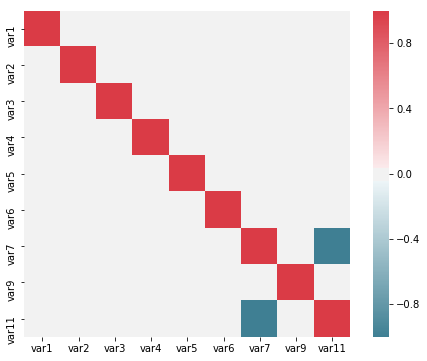

In [16]:
# Get numerical and ordinal features
data_num = df[['var1','var2','var3','var4','var5','var6','var7','var9','var11']]

# Correlation plot
fig, ax = plt.subplots(figsize=(8, 6))
corr = data_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### It appears that "var7" and "var11" have a strong negative correlation relationship. 

#### Plotly

In [17]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='byshao', api_key='yOUzVyKF6EBBhqgRZLjn')

### Data Preprocessing

#### 1. Analyze and transform outliers for "var9"

Upper bound: 31.0 Lower bound: 1.0


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



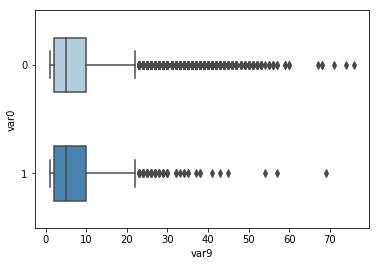

In [18]:
sns.boxplot(x=df.var9[df.var9>-999], y=df["var0"],palette="Blues",width=0.5,orient="h")

# Detect the upper and lower bound value for var9
upper = np.percentile(df['var9'], 99)
lower = np.percentile(df['var9'], 1)
print("Upper bound:",upper,"Lower bound:",lower)

# Transform outliers
df['var9'].loc[df['var9']>upper] = upper
df['var9'].loc[df['var9']<lower] = lower

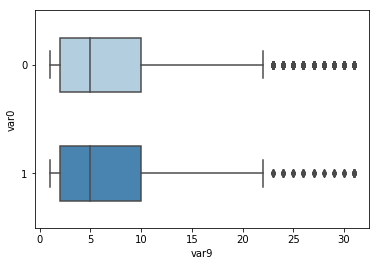

In [19]:
sns.boxplot(x=df["var9"], y=df["var0"],palette="Blues",width=0.5,orient="h")

#### 2. Fill-in missing value for "var8" with mode

In [20]:
df.var8.unique()

array(['N', nan, 'Y'], dtype=object)

In [21]:
df.var8.value_counts()

N    85537
Y     9529
Name: var8, dtype: int64

In [22]:
df['var8'].fillna(df['var8'].mode()[0], inplace=True)

#### 3. Create dummy variable

In [23]:
dummy_df = pd.get_dummies(df,drop_first=True)

In [24]:
x = dummy_df.drop('var0_1',axis=1,inplace=False)

In [25]:
y = dummy_df["var0_1"]

#### 4. Split Train, Validation, Test dataset

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [27]:
X_train.shape,X_valid.shape,X_test.shape

((64000, 13), (16000, 13), (20000, 13))

#### 5. Normalization

In [28]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Modeling

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn import naive_bayes, neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from ggplot import *

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [30]:
def measure_performance(X, y, clf, show_auc=True, show_classification_report=True, show_confusion_matrix=True):
    #y_pred = cross_val_predict(clf, X, y, cv=skf)
    y_pred = clf.predict(X)
    if show_auc:
        preds = clf.predict_proba(X)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y, preds)
        auc = metrics.auc(fpr, tpr)
        print("Auc:{0:.3f}".format(auc),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred,labels=[1,0]),"\n")
    if show_confusion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred,labels=[1,0]),"\n")

In [31]:
def auc_score(X,y,clf):
    preds = clf.predict_proba(X)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds)
    auc = metrics.auc(fpr, tpr)
    return auc

In [32]:
def auc_plot(X,y,clf):
    preds = clf.predict_proba(X)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y, preds)
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    auc = metrics.auc(fpr,tpr)
    plot = (ggplot(df,aes(x='fpr', y='tpr'))
            +geom_line(aes(y='tpr'))
            +geom_abline(linetype='dashed')
            +geom_area(alpha=0.2)
            +ggtitle("ROC Curve w/ AUC=%s" % str(auc)))
    return plot

#### Set-up somte oversampling schema

In [33]:
sm = SMOTE(random_state=12, ratio = "minority")
x_sm_train,y_sm_train = sm.fit_sample(X_train, y_train)

#### Naive Bayes Classifier

In [35]:
# General Baseline
gnbclf = naive_bayes.GaussianNB()
gnbclf.fit(x_sm_train, y_sm_train)
print("Training:")
measure_performance(x_sm_train, y_sm_train, gnbclf)
print("Validation:")
measure_performance(X_valid, y_valid, gnbclf)
print("Testing:")
measure_performance(X_test, y_test, gnbclf)

Training:
Auc:0.829 

Classification report
             precision    recall  f1-score   support

          1       0.51      0.99      0.68     62430
          0       0.89      0.05      0.10     62430

avg / total       0.70      0.52      0.39    124860
 

Confussion matrix
[[62008   422]
 [59097  3333]] 

Validation:
Auc:0.786 

Classification report
             precision    recall  f1-score   support

          1       0.03      0.97      0.05       392
          0       0.99      0.05      0.10     15608

avg / total       0.96      0.07      0.10     16000
 

Confussion matrix
[[  380    12]
 [14804   804]] 

Testing:
Auc:0.798 

Classification report
             precision    recall  f1-score   support

          1       0.03      0.98      0.05       491
          0       0.99      0.05      0.10     19509

avg / total       0.97      0.08      0.10     20000
 

Confussion matrix
[[  482     9]
 [18465  1044]] 



#### K-NN Classifier

In [185]:
# KNN Baseline
knn = neighbors.KNeighborsClassifier()
knn.fit(x_sm_train, y_sm_train)
print("Training:")
measure_performance(x_sm_train, y_sm_train, knn)
print("Validation:")
measure_performance(X_valid, y_valid, knn)
print("Testing:")
measure_performance(X_test, y_test, knn)

Training:
Auc:1.000 

Classification report
             precision    recall  f1-score   support

          1       0.91      1.00      0.95     62430
          0       1.00      0.91      0.95     62430

avg / total       0.96      0.95      0.95    124860
 

Confussion matrix
[[62419    11]
 [ 5887 56543]] 

Validation:
Auc:0.650 

Classification report
             precision    recall  f1-score   support

          1       0.06      0.36      0.11       392
          0       0.98      0.86      0.92     15608

avg / total       0.96      0.85      0.90     16000
 

Confussion matrix
[[  143   249]
 [ 2109 13499]] 

Testing:
Auc:0.663 

Classification report
             precision    recall  f1-score   support

          1       0.07      0.37      0.12       491
          0       0.98      0.87      0.93     19509

avg / total       0.96      0.86      0.91     20000
 

Confussion matrix
[[  183   308]
 [ 2454 17055]] 



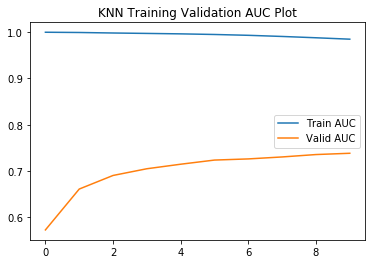

In [160]:
# Tuning number of K
k_neighbor = range(1,50,5)

knn_params=[]
knn_train=[]
knn_valid=[]
for k in k_neighbor:
            knn_params.append(k)
            clf = neighbors.KNeighborsClassifier(n_neighbors=k)
            clf = clf.fit(x_sm_train,y_sm_train)
            train_auc = auc_score(x_sm_train, y_sm_train, clf)
            valid_auc = auc_score(X_valid, y_valid, clf)
            knn_train.append(train_auc)
            knn_valid.append(valid_auc)
plt.plot(knn_train,label='Train AUC')
plt.plot(knn_valid,label='Valid AUC')
plt.title("KNN Training Validation AUC Plot")
plt.legend(loc=7)

In [161]:
k_neighbor[5],knn_train[5],knn_valid[5]

(26, 0.99515759313092855, 0.72350831990920406)

Testing:
Auc:0.737 

Classification report
             precision    recall  f1-score   support

          1       0.06      0.57      0.11       491
          0       0.99      0.77      0.87     19509

avg / total       0.96      0.77      0.85     20000
 

Confussion matrix
[[  282   209]
 [ 4445 15064]] 



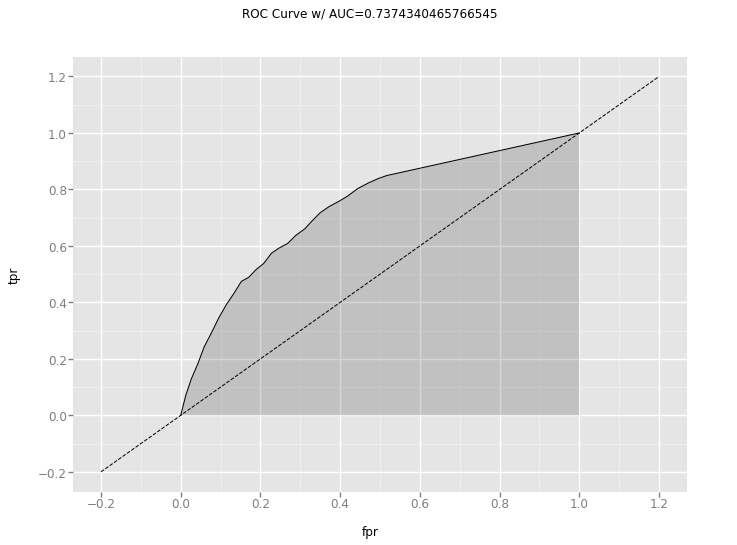

<ggplot: (-9223372036566529115)>

In [36]:
# KNN Final Model Performance
sm_knnclf = neighbors.KNeighborsClassifier(n_neighbors=26)
sm_knnclf.fit(x_sm_train,y_sm_train)
print("Testing:")
measure_performance(X_test, y_test, sm_knnclf)
auc_plot(X_test,y_test,sm_knnclf)

#### Decision Tree

In [232]:
# DT Baseline
dtclf = DecisionTreeClassifier(random_state=42,criterion='gini')
dtclf.fit(x_sm_train,y_sm_train)
print("Training:")
measure_performance(x_sm_train, y_sm_train, dtclf)
print("Validation:")
measure_performance(X_valid, y_valid, dtclf)
print("Testing:")
measure_performance(X_test, y_test, dtclf)

Training:
Auc:1.000 

Classification report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00     62430
          0       1.00      1.00      1.00     62430

avg / total       1.00      1.00      1.00    124860
 

Confussion matrix
[[62430     0]
 [    0 62430]] 

Validation:
Auc:0.556 

Classification report
             precision    recall  f1-score   support

          1       0.10      0.14      0.12       392
          0       0.98      0.97      0.97     15608

avg / total       0.96      0.95      0.95     16000
 

Confussion matrix
[[   56   336]
 [  491 15117]] 

Testing:
Auc:0.557 

Classification report
             precision    recall  f1-score   support

          1       0.11      0.14      0.12       491
          0       0.98      0.97      0.97     19509

avg / total       0.96      0.95      0.95     20000
 

Confussion matrix
[[   71   420]
 [  579 18930]] 



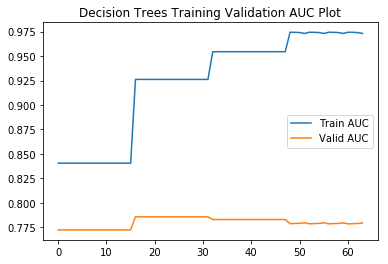

In [233]:
# Tuning DT parameters
dtmd=range(2,10,2)
dtml=range(2,10,2)
dtms=range(1000,1400,100)

#rfmd=range(2,8,2)
#rfml=range(200,500,50)
#rfms=range(200,1000,100)

dt_params=[]
dt_train=[]
dt_valid=[]
for i in dtmd:
    for j in dtml:
        for k in dtms:
            dt_params.append(str(i)+str(j)+str(k))
            clf = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=j,min_samples_split=k,random_state=42)
            clf = clf.fit(x_sm_train,y_sm_train)
            train_auc = auc_score(x_sm_train, y_sm_train, clf)
            valid_auc = auc_score(X_valid, y_valid, clf)
            dt_train.append(train_auc)
            dt_valid.append(valid_auc)
plt.plot(dt_train,label='Train AUC')
plt.plot(dt_valid,label='Valid AUC')
plt.title("Decision Trees Training Validation AUC Plot")
plt.legend(loc=7)

In [234]:
dt_params[14:20],dt_train[14:20],dt_valid[14:20]

(['281200', '281300', '421000', '421100', '421200', '421300'],
 [0.84059038488957383,
  0.84059038488957383,
  0.92613655367052916,
  0.92613655367052916,
  0.92613655367052916,
  0.92613655367052916],
 [0.7724381269678553,
  0.7724381269678553,
  0.78579437284908848,
  0.78579437284908848,
  0.78579437284908848,
  0.78579437284908848])

Testing:
Auc:0.811 

Classification report
             precision    recall  f1-score   support

          1       0.08      0.65      0.14       491
          0       0.99      0.81      0.89     19509

avg / total       0.97      0.81      0.87     20000
 

Confussion matrix
[[  320   171]
 [ 3676 15833]] 



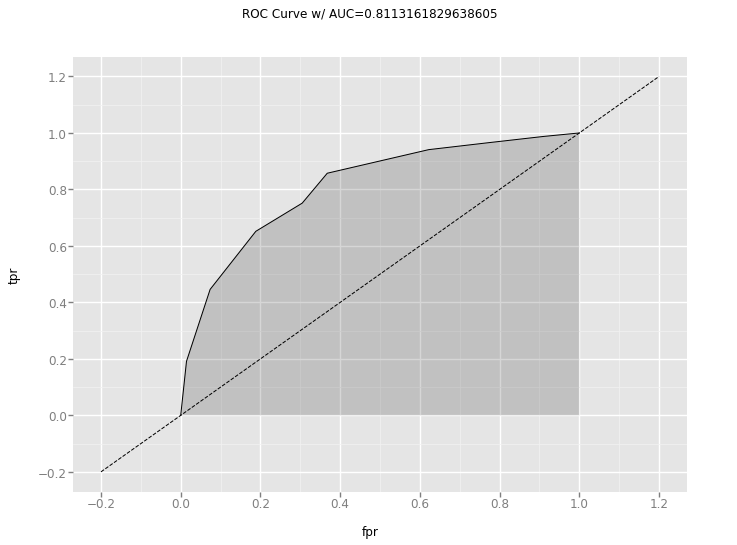

<ggplot: (288246585)>

In [37]:
# DT Final Model Performance
sm_dtclf = DecisionTreeClassifier(criterion='gini',
                                  max_depth=4, min_samples_leaf=2, 
                                  min_samples_split=1000, random_state=42)
sm_dtclf.fit(x_sm_train,y_sm_train)
print("Testing:")
measure_performance(X_test, y_test, sm_dtclf)
auc_plot(X_test,y_test,sm_dtclf)

#### Feature Imprtances Visualization

In [70]:
feature_importances = sm_dtclf.feature_importances_

Y = feature_importances
X = x.columns
data = [go.Bar(
            x= X,
            y= Y,
            width = 0.8,
            marker=dict(
            color = feature_importances,
            colorscale='Portland',
            showscale=False,
            reversescale = False
            ),
            opacity=0.8
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

#### Tree Visualization

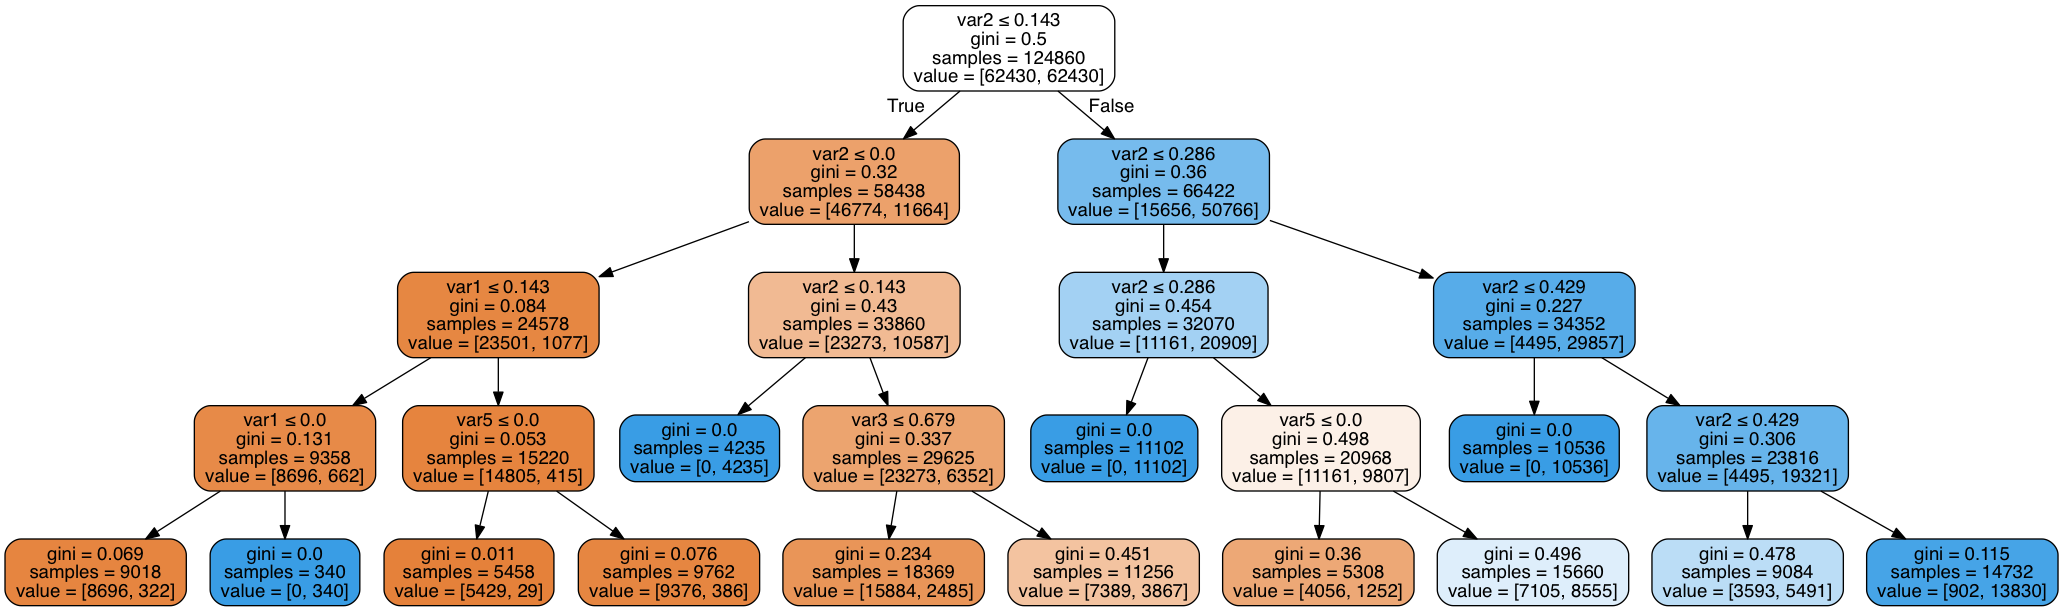

In [237]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(sm_dtclf, out_file=dot_data, feature_names = X,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Random Forest Classifier

In [212]:
# RF Baseline
rfclf = RandomForestClassifier(random_state=42)
sm_rfclf = rfclf.fit(x_sm_train,y_sm_train)
print("Training:")
measure_performance(x_sm_train, y_sm_train, sm_rfclf)
print("Validation:")
measure_performance(X_valid, y_valid, sm_rfclf)
print("Testing:")
measure_performance(X_test, y_test, sm_rfclf)

Training:
Auc:0.972 

Classification report
             precision    recall  f1-score   support

          1       0.92      0.91      0.91     62430
          0       0.91      0.92      0.91     62430

avg / total       0.91      0.91      0.91    124860
 

Confussion matrix
[[56685  5745]
 [ 5208 57222]] 

Validation:
Auc:0.802 

Classification report
             precision    recall  f1-score   support

          1       0.11      0.44      0.18       392
          0       0.98      0.91      0.95     15608

avg / total       0.96      0.90      0.93     16000
 

Confussion matrix
[[  172   220]
 [ 1358 14250]] 

Testing:
Auc:0.822 

Classification report
             precision    recall  f1-score   support

          1       0.12      0.48      0.20       491
          0       0.99      0.91      0.95     19509

avg / total       0.96      0.90      0.93     20000
 

Confussion matrix
[[  236   255]
 [ 1676 17833]] 



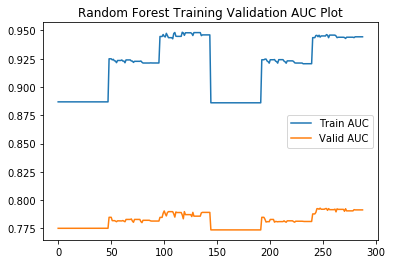

In [238]:
# Tuning RF parameters
rfes=range(50,150,50)
rfmd=range(2,8,2)
rfml=range(200,500,50)
rfms=range(200,1000,100)

rf_params=[]
rf_train=[]
rf_valid=[]
for t in rfes:
    for i in rfmd:
        for j in rfml:
            for k in rfms:
                rf_params.append(str(t)+str(i)+str(j)+str(k))
                clf = RandomForestClassifier(criterion='gini',random_state=42,n_estimators=t,
                                             max_depth=i,min_samples_leaf=j,min_samples_split=k)
                clf = clf.fit(x_sm_train,y_sm_train)
                train_auc = auc_score(x_sm_train, y_sm_train, clf)
                valid_auc = auc_score(X_valid, y_valid, clf)
                rf_train.append(train_auc)
                rf_valid.append(valid_auc)
plt.plot(rf_train,label='Train AUC')
plt.plot(rf_valid,label='Valid AUC')
plt.title("Random Forest Training Validation AUC Plot")
plt.legend(loc=7)

In [239]:
rf_params[46:52],rf_train[46:52],rf_valid[46:52]

(['502450800',
  '502450900',
  '504200200',
  '504200300',
  '504200400',
  '504200500'],
 [0.88688594361998097,
  0.88688594361998097,
  0.92496593859317544,
  0.92496593859317544,
  0.92496593859317544,
  0.92401202600155807],
 [0.77513910644985828,
  0.77513910644985828,
  0.78483831224698997,
  0.78483831224698997,
  0.78483831224698997,
  0.78188693788637953])

Testing:
Auc:0.810 

Classification report
             precision    recall  f1-score   support

          1       0.08      0.67      0.14       491
          0       0.99      0.80      0.89     19509

avg / total       0.97      0.80      0.87     20000
 

Confussion matrix
[[  331   160]
 [ 3869 15640]] 



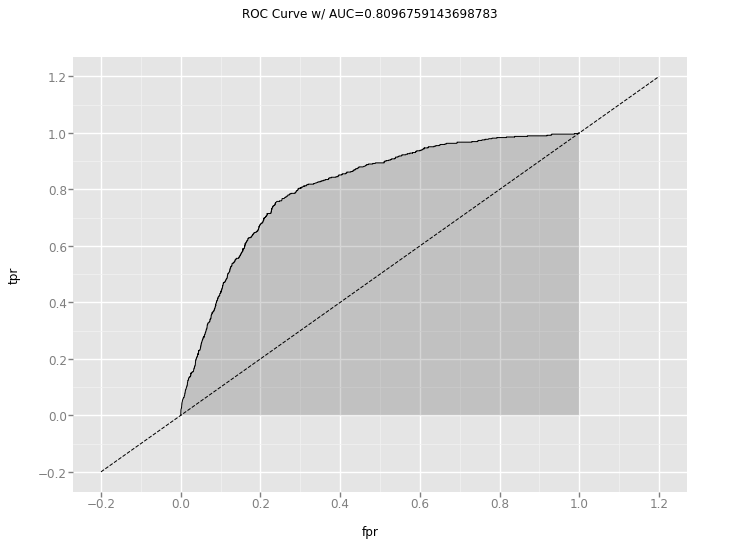

<ggplot: (-9223372036559666495)>

In [38]:
# RF Final Model Performance
rfclf = RandomForestClassifier(criterion='gini',random_state=42,n_estimators=50,
                               max_depth=4,min_samples_leaf=200,min_samples_split=200)
sm_rfclf = rfclf.fit(x_sm_train,y_sm_train)
print("Testing:")
measure_performance(X_test, y_test, sm_rfclf)
auc_plot(X_test,y_test,sm_rfclf)

#### XGBoost

In [1]:
from xgboost import XGBClassifier

In [56]:
# xgboost baseline
xgboost = XGBClassifier(random_state=42,max_depth=4,eta=0.001,min_samples_split=1000,min_samples_leaf=200)
sm_xgboost = xgboost.fit(x_sm_train,y_sm_train)
print("Training:")
measure_performance(x_sm_train, y_sm_train, sm_xgboost)
print("Validation:")
measure_performance(X_valid, y_valid, sm_xgboost)
print("Testing:")
measure_performance(X_test, y_test, sm_xgboost)

Training:
Auc:0.995 

Classification report
             precision    recall  f1-score   support

          1       1.00      0.96      0.98     62430
          0       0.96      1.00      0.98     62430

avg / total       0.98      0.98      0.98    124860
 

Confussion matrix
[[60004  2426]
 [  258 62172]] 

Validation:
Auc:0.808 

Classification report
             precision    recall  f1-score   support

          1       0.40      0.12      0.18       392
          0       0.98      1.00      0.99     15608

avg / total       0.96      0.97      0.97     16000
 

Confussion matrix
[[   46   346]
 [   68 15540]] 

Testing:
Auc:0.833 

Classification report
             precision    recall  f1-score   support

          1       0.38      0.11      0.17       491
          0       0.98      1.00      0.99     19509

avg / total       0.96      0.97      0.97     20000
 

Confussion matrix
[[   52   439]
 [   84 19425]] 



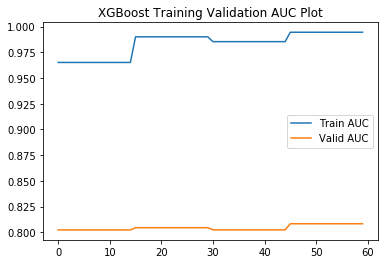

In [64]:
# Tuning XGBoost parameters
xgbes=range(50,150,50)
xgbmd=range(2,6,2)
xgbml=range(200,500,100)
xgbms=range(500,1000,100)

xgb_params=[]
xgb_train=[]
xgb_valid=[]
for t in xgbes:
    for i in xgbmd:
        for j in xgbml:
            for k in xgbms:
                xgb_params.append(str(t)+str(i)+str(j)+str(k))
                clf = XGBClassifier(criterion='gini',random_state=42,n_estimators=t,
                                    max_depth=i,min_samples_leaf=j,min_samples_split=k)
                clf = clf.fit(x_sm_train,y_sm_train)
                train_auc = auc_score(x_sm_train, y_sm_train, clf)
                valid_auc = auc_score(X_valid, y_valid, clf)
                xgb_train.append(train_auc)
                xgb_valid.append(valid_auc)
plt.plot(xgb_train,label='Train AUC')
plt.plot(xgb_valid,label='Valid AUC')
plt.title("XGBoost Training Validation AUC Plot")
plt.legend(loc=7)

In [66]:
xgb_params[13:16],xgb_train[13:16],xgb_valid[13:16]

(['502400800', '502400900', '504200500'],
 [0.9651547664507106, 0.9651547664507106, 0.9900947249610899],
 [0.8022296421772193, 0.8022296421772193, 0.8043968981108589])

Testing:
Auc:0.833 

Classification report
             precision    recall  f1-score   support

          1       0.38      0.11      0.17       491
          0       0.98      1.00      0.99     19509

avg / total       0.96      0.97      0.97     20000
 

Confussion matrix
[[   52   439]
 [   84 19425]] 



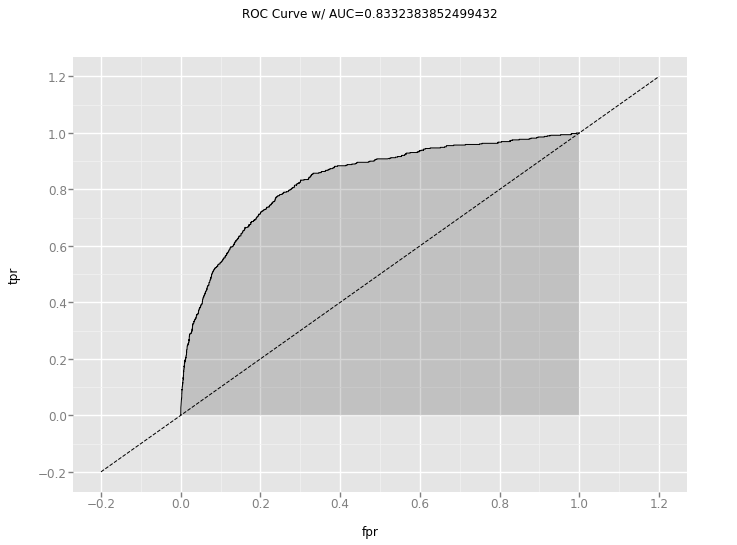

<ggplot: (-9223372036554652584)>

In [73]:
# XGBoost Final Model Performance
xgboost = XGBClassifier(random_state=42,criterion='gini',max_depth=4,min_samples_leaf=200,min_samples_split=500)
sm_xgboost = xgboost.fit(x_sm_train,y_sm_train)
print("Testing:")
measure_performance(X_test, y_test, sm_xgboost)
auc_plot(X_test, y_test, sm_xgboost)

#### Stacking

In [68]:
clf1 = gnbclf
clf2 = sm_knnclf
clf3 = sm_dtclf
clf4 = sm_rfclf
clf5 = sm_xgboost

stackclf = VotingClassifier(estimators=[('Naive Bayes', clf1), ('KNN', clf2), 
                                        ('Decision Tree', clf3), ('Random Forest', clf4),
                                        ('XGBoost', clf5)], voting='soft')
stackclf.fit(x_sm_train,y_sm_train)

print("Training:")
measure_performance(x_sm_train, y_sm_train, stackclf)
print("Validation:")
measure_performance(X_valid, y_valid, stackclf)
print("Testing:")
measure_performance(X_test, y_test, stackclf)

Training:
Auc:0.994 

Classification report
             precision    recall  f1-score   support

          1       0.86      0.99      0.92     62430
          0       0.99      0.84      0.91     62430

avg / total       0.92      0.91      0.91    124860
 

Confussion matrix
[[61929   501]
 [10200 52230]] 

Validation:
Auc:0.800 

Classification report
             precision    recall  f1-score   support

          1       0.08      0.62      0.14       392
          0       0.99      0.82      0.90     15608

avg / total       0.97      0.82      0.88     16000
 

Confussion matrix
[[  243   149]
 [ 2752 12856]] 

Testing:
Auc:0.823 

Classification report
             precision    recall  f1-score   support

          1       0.09      0.65      0.16       491
          0       0.99      0.83      0.90     19509

avg / total       0.97      0.83      0.88     20000
 

Confussion matrix
[[  320   171]
 [ 3308 16201]] 



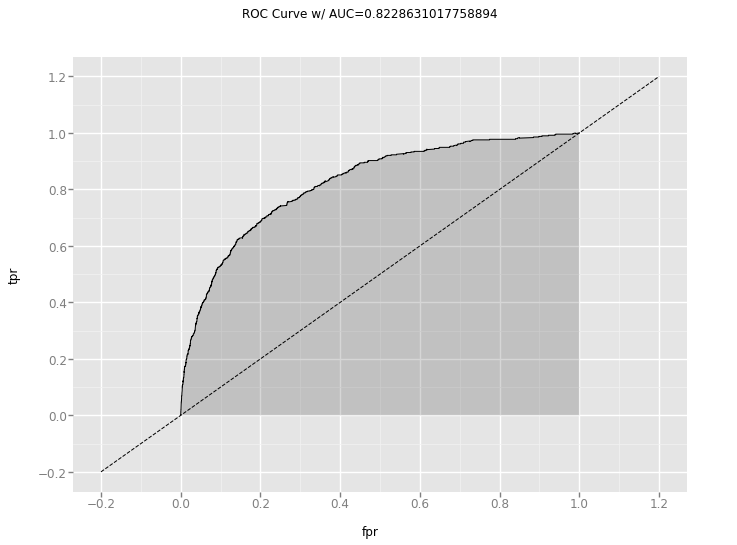

<ggplot: (-9223372036555113009)>

In [69]:
auc_plot(X_test, y_test, stackclf)